In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [19]:
df = pd.read_csv("exams.csv",skiprows=0,delimiter=",")
print(df)

        exam1      exam2  admit
0   34.623660  78.024693      0
1   30.286711  43.894998      0
2   35.847409  72.902198      0
3   60.182599  86.308552      1
4   79.032736  75.344376      1
..        ...        ...    ...
95  83.489163  48.380286      1
96  42.261701  87.103851      1
97  99.315009  68.775409      1
98  55.340018  64.931938      1
99  74.775893  89.529813      1

[100 rows x 3 columns]


In [20]:
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

In [21]:
X

,exam1,exam2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938


In [22]:
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: admit, Length: 100, dtype: int64

In [23]:
admit_yes = df.loc[y == 1]
admit_no = df.loc[y == 0]

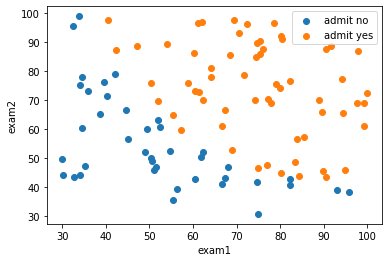

In [24]:
plt.scatter(admit_no.iloc[:,0],admit_no.iloc[:,1],label="admit no")
plt.scatter(admit_yes.iloc[:,0],admit_yes.iloc[:,1],label="admit yes")
plt.xlabel("exam1")
plt.ylabel("exam2")
plt.legend()
plt.show()

In [25]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train.shape)

(75, 2)


In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)

In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
#tn, fp, fn, tp

[[11  0]
 [ 4 10]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


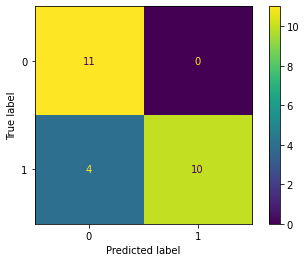

In [29]:
metrics.plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84
Precision: 1.0
Recall: 0.7142857142857143


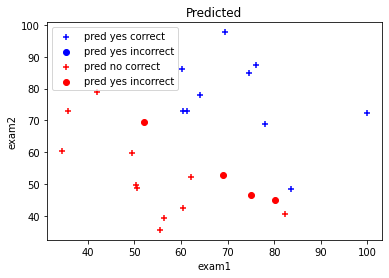

In [31]:
y_test2 = y_test.to_numpy()
idx1 = np.logical_and(y_pred == 1, y_test2 == 1)
idx2 = np.logical_and(y_pred == 1, y_test2 == 0)
idx3 = np.logical_and(y_pred == 0, y_test2 == 0)
idx4 = np.logical_and(y_pred == 0, y_test2 == 1)
X1 = X_test.loc[idx1]
X2 = X_test.loc[idx2]
X3 = X_test.loc[idx3]
X4 = X_test.loc[idx4]

plt.scatter(X1.iloc[:,0],X1.iloc[:,1],label="pred yes correct",marker="+",color="blue")
plt.scatter(X2.iloc[:,0],X2.iloc[:,1],label="pred yes incorrect",marker="o",color="blue")
plt.scatter(X3.iloc[:,0],X3.iloc[:,1],label="pred no correct",marker="+",color="red")
plt.scatter(X4.iloc[:,0],X4.iloc[:,1],label="pred yes incorrect",marker="o",color="red")

plt.xlabel("exam1")
plt.ylabel("exam2")
plt.legend()
plt.title("Predicted")
plt.show()